# Prédiction du Taux de Congestion à Abidjan
Ce notebook analyse et prédit les taux de congestion dans différentes zones d'Abidjan.

## 1. Import des Bibliothèques

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## 2. Chargement et Préparation des Données

In [186]:
df = pd.read_csv("points_ralentissement_abidjan.csv")

df["heure_num"] = df["heure"].str.slice(0, 2).astype(int)
df['date'] = pd.to_datetime(df['date'])
df['date_timestamp'] = df['date'].astype('int64') // 10**9

df.head()

,id_point,commune,latitude,longitude,date,heure,type_jour,meteo,evenement,chantier,affluence,taux_congestion,heure_num,date_timestamp
0,P001,Cocody,5.3540,-3.9714,2025-04-01,08:26,Ouvrable,Orage,Manifestation,Oui,46,5,8,1743465600
1,P002,Yopougon,5.3670,-4.0701,2025-04-01,08:54,Ouvrable,Nuageux,Aucun,Non,27,2,8,1743465600
2,P003,Abobo,5.4234,-4.0155,2025-04-01,08:54,Ouvrable,Pluie,Aucun,Oui,69,5,8,1743465600
3,P004,Marcory,5.3053,-3.9981,2025-04-01,08:11,Ouvrable,Nuageux,Aucun,Oui,98,5,8,1743465600
4,P005,Plateau,5.3361,-4.0244,2025-04-01,08:12,Ouvrable,Nuageux,Concert,Non,101,5,8,1743465600


## 3. Analyse Exploratoire des Données

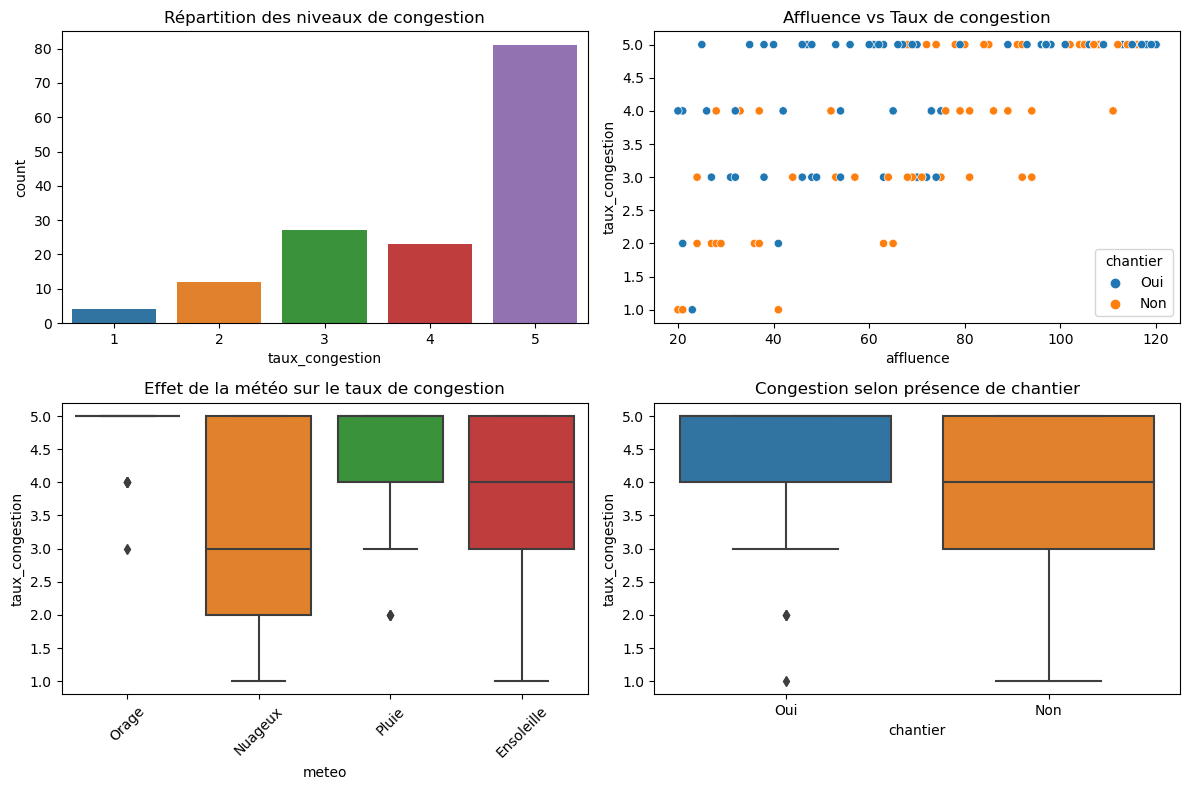

In [187]:
def plot_congestion_analysis():
    # repartion du taux de congestion
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.countplot(x="taux_congestion", data=df)
    plt.title("Répartition des niveaux de congestion")
    
    # correlation entre affluence et taux de congestion
    plt.subplot(2, 2, 2)
    sns.scatterplot(x="affluence", y="taux_congestion", data=df, hue="chantier")
    plt.title("Affluence vs Taux de congestion")
    
    # impact de la meteo
    plt.subplot(2, 2, 3)
    sns.boxplot(x="meteo", y="taux_congestion", data=df)
    plt.title("Effet de la météo sur le taux de congestion")
    plt.xticks(rotation=45)
    
    # effet des chantiers
    plt.subplot(2, 2, 4)
    sns.boxplot(x="chantier", y="taux_congestion", data=df)
    plt.title("Congestion selon présence de chantier")
    
    plt.tight_layout()
    plt.show()

plot_congestion_analysis()

## 4. Préparation des Features

In [188]:
# selection des features
X = df[["commune", "meteo", "evenement", "chantier", "type_jour", 
        "affluence", "heure_num", "latitude", "longitude", "date_timestamp"]]
y = df["taux_congestion"]

# encode categorical variables
X_encoded = pd.get_dummies(X)

# diviser le dataset en train et test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## 5. Modélisation et Évaluation

Évaluation de Linear Regression...
Évaluation de Ridge...
Évaluation de Lasso...
Évaluation de Decision Tree...
Évaluation de Random Forest...
Évaluation de Gradient Boosting...
Évaluation de SVR...

Comparaison des performances des modèles :


,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest,Gradient Boosting,SVR
MAE,0.527,0.515,0.592,0.433,0.434,0.461,0.687
RMSE,0.639,0.626,0.743,0.876,0.667,0.620,1.069
R²,0.503,0.524,0.329,0.068,0.458,0.533,-0.391


<Figure size 1200x600 with 0 Axes>

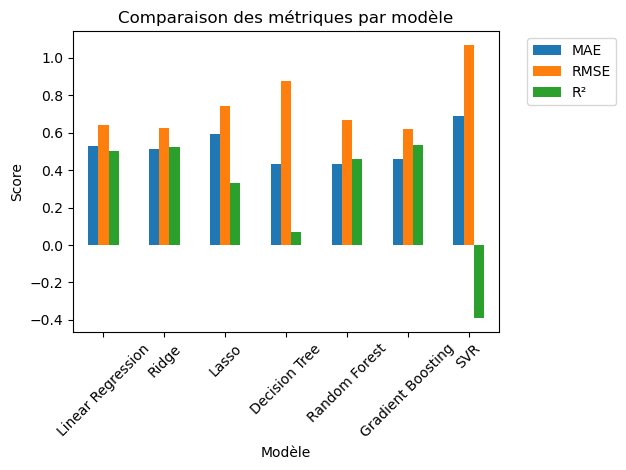

In [189]:
# fonction d'evaluation des modeles
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }

# definition des modeles
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# evaluation des modeles
results = {}
for name, model in models.items():
    print(f"Évaluation de {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# affichage des resultats
results_df = pd.DataFrame(results).round(3)
print("\nComparaison des performances des modèles :")
display(results_df)

# visualisation des resultats
plt.figure(figsize=(12, 6))
results_df.T.plot(kind='bar')
plt.title("Comparaison des métriques par modèle")
plt.xlabel("Modèle")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 6. Analyse du Meilleur Modèle

Le meilleur modèle est : Gradient Boosting

Métriques du meilleur modèle :
MAE: 0.461
RMSE: 0.620
R²: 0.533


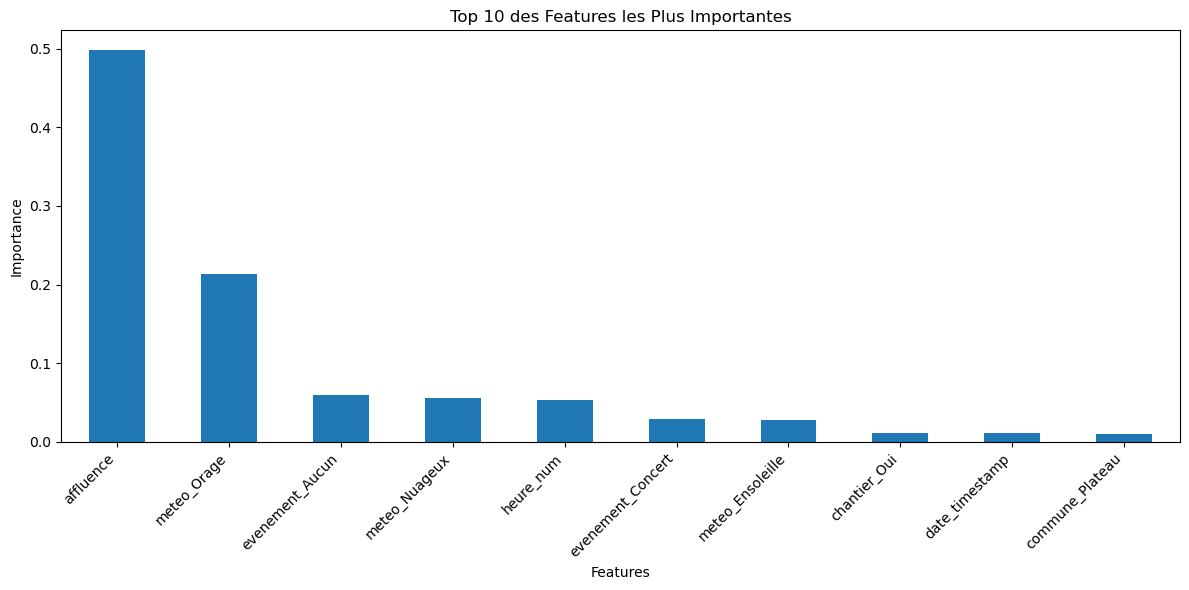

In [190]:
# selection et sauvegarde du meilleur modele
best_model_name = max(results.items(), key=lambda x: x[1]['R²'])[0]
best_model = models[best_model_name]

print(f"Le meilleur modèle est : {best_model_name}")
print("\nMétriques du meilleur modèle :")
for metric, value in results[best_model_name].items():
    print(f"{metric}: {value:.3f}")

# sauvegarde du meilleur modèle
dump(best_model, 'best_model.joblib')
dump(X_encoded.columns, 'columns.joblib')

# analyse des features importantes
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feat_importances = pd.Series(importances, index=X_encoded.columns)
    feat_importances = feat_importances.sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    feat_importances.head(10).plot(kind='bar')
    plt.title("Top 10 des Features les Plus Importantes")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()